In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emachine as EM
import itertools

In [2]:
np.random.seed(0)

In [3]:
s0 = np.loadtxt('../MNIST_data/mnist_test.csv',delimiter=',')

In [4]:
seq = s0[:,1:] 
label = s0[:,0]
print(seq.shape,label.shape)

(10000, 784) (10000,)


In [5]:
# select only 1 digit
digit = 8
i = label == digit
label1 = label[i]
seq1 = seq[i]
print(digit,seq1.shape)

# convert to binary
seq1 = np.sign(seq1-1.5)

8 (974, 784)


In [6]:
n = seq1.shape[0]
m = int(np.sqrt(seq1.shape[1]))
seq2 = seq1.reshape(n,m,m)

In [7]:
t = 2
seq_recover = seq1[t].copy()
seq_hidden = seq1[t].copy()

select_hidden = np.loadtxt('select_hidden.txt').astype(int)
s_hidden = np.loadtxt('s_hidden.txt')
seq_recover[select_hidden] = s_hidden

In [8]:
cols_hidden = np.loadtxt('cols_hidden.txt').astype(int)
cols_neg = np.loadtxt('cols_neg.txt').astype(int)
cols_pos = np.loadtxt('cols_pos.txt').astype(int)

hidden_neg = np.intersect1d(cols_hidden,cols_neg)
hidden_pos = np.intersect1d(cols_hidden,cols_pos)

seq_hidden[cols_hidden] = 0.
seq_recover[hidden_neg] = -1
seq_recover[hidden_pos] = 1

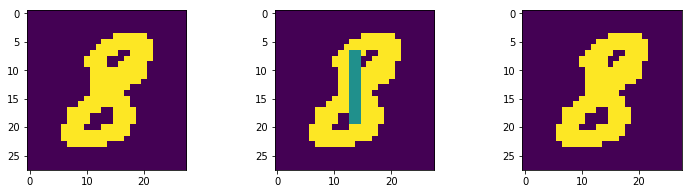

In [10]:
nx,ny = 3,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))
ax[0].imshow(seq1[t].reshape(28,28),interpolation='nearest')
ax[1].imshow(seq_hidden.reshape(28,28),interpolation='nearest')
ax[2].imshow(seq_recover.reshape(28,28),interpolation='nearest')

plt.tight_layout(h_pad=0.7, w_pad=1.5)
plt.savefig('fig4.pdf', format='pdf', dpi=100)